In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [12]:
df = pd.read_csv("Classified Data.csv",index_col=0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [14]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [18]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [19]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
pred = knn.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print (confusion_matrix(y_test,pred))

[[135  15]
 [ 14 136]]


In [28]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       150
           1       0.90      0.91      0.90       150

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [29]:
#finding K value(ELBOW METHOD)

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

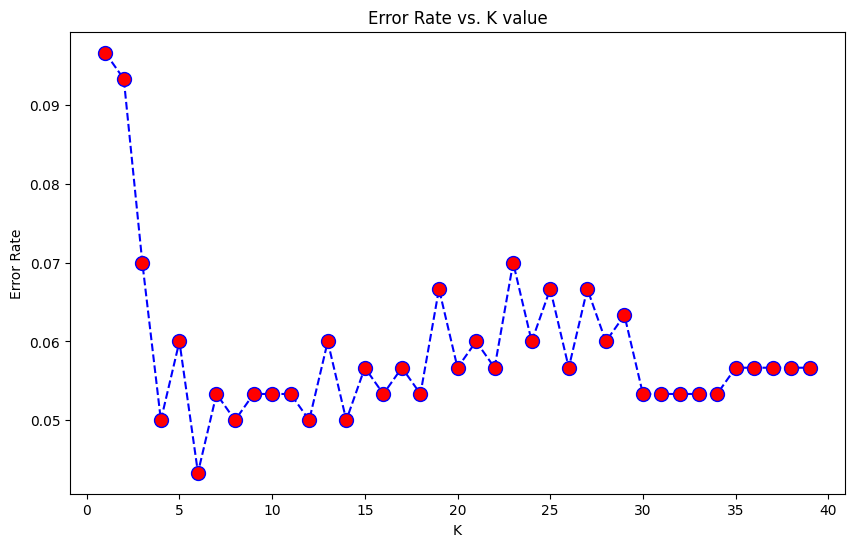

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle="dashed",marker="o",markerfacecolor="red",markersize=10)
plt.title("Error Rate vs. K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [31]:
knn = KNeighborsClassifier(n_neighbors=34)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=34)

In [26]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print (confusion_matrix(y_test,pred))

[[134  11]
 [  7 148]]


In [30]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       145
           1       0.93      0.95      0.94       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

